In [2]:
#import 
import logging
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from umap import UMAP
import matplotlib.pyplot as plt
from reval.best_nclust_cv import FindBestClustCV

In [5]:
main_path = '/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/vine_old_edition'
data_path = os.path.join(main_path,"data","tidy","vineland_ed_corrected")
results_path = os.path.join(main_path,"results")
plot_path = os.path.join(main_path,"plot")

In [10]:
# load train set
file = 'NDA_tr_format_corrected_old.csv'
X_tr_ = pd.read_csv(os.path.join(data_path,file),
                        header=0,
                        #skiprows=[1],
                        low_memory=False,
                        index_col='subjectkey')
# load test set
file = 'NDA_ts_format_corrected_old.csv'
X_ts_ = pd.read_csv(os.path.join(data_path,file),
                        header=0,
                        #skiprows=[1],
                        low_memory=False,
                        index_col='subjectkey')
#keep track of the original
TR_original = X_tr_.copy()
TS_original = X_ts_.copy()

In [11]:
vabs_names = ['communicationdomain_totalb','livingskillsdomain_totalb',
              'socializationdomain_totalb']
col2use=vabs_names

In [12]:
# preprocessing

# imputation
impute = KNNImputer(n_neighbors=5)

# scaling  
Scaler = StandardScaler()

#umap
Umap = UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)

# impute then scale than UMAP
X_tr_prepr = pd.DataFrame(Umap.fit_transform(Scaler.fit_transform(impute.fit_transform(X_tr_[col2use]))), index = X_tr_.index)
X_ts_prepr = pd.DataFrame(Umap.transform(Scaler.transform(impute.transform(X_ts_[col2use]))), index = X_ts_.index)



In [14]:
print(len(X_tr_.index))
print(len(X_ts_.index))

1715
846


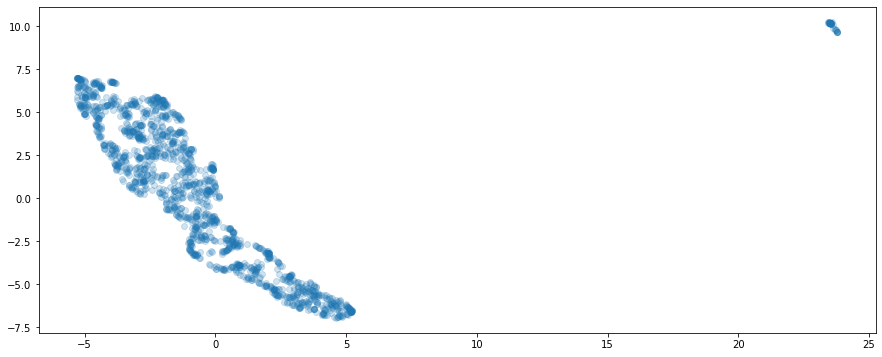

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(X_tr_prepr[[0]], X_tr_prepr[[1]],alpha=0.2)

In [16]:
def Gridsearch(X_tr,strat_vect):

    
    # GRID SEARCH
    
    # initialize impty saving matrices
    #metric_df = pd.DataFrame()
    metric_dict ={'fold': [],"n_neigh":[],'ncl':[],'stab':[],'err':[]}
    
    
    # define params to test
    # KMEANS
    clust = KMeans(random_state=42)
    vect_hyper = [5,15,30]
    
    
    vect_fold = [2]
    
    # run the grid search
    for f in vect_fold:
        for n in vect_hyper:
            logging.info(f"fold:{f} -- nighbors:{n}")
            clf = KNeighborsClassifier(n_neighbors=n)
            #clf = RandomForestClassifier(n_estimators=n)
            relval = FindBestClustCV(s=clf, c=clust, nfold=f, nclust_range=list(range(2,11,1)), nrand=100)
            metric, ncl,_ = relval.best_nclust(X_tr,iter_cv=100, strat_vect = strat_vect) 
            metric_dict['fold'].append(f)
            metric_dict['n_neigh'].append(n)
            metric_dict['ncl'].append(ncl)
            metric_dict['stab'].append(metric['val'][ncl][0])
            metric_dict['err'].append(metric['val'][ncl][1][1])

    metric_df = pd.DataFrame(metric_dict)

    return metric_df


In [17]:
len(X_tr_prepr.index.unique())

1715

In [20]:
X_tr_

,Unnamed: 0,collection_id,src_subject_id,sex,interview_age,interview_date,original_communicationdomain_totalb,original_livingskillsdomain_totalb,original_socializationdomain_totalb,original_motorskillsdomain_totalb,...,vabs_type,miss,age_round,quantile_age,format,TR_TS,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,composite_totalb
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARUY282MTC,1,2288,A39P5613,M,95,09/22/2017,71.0,70.0,77.0,NaN,...,3,0,7.916667,1,ed_3,tr,74.911222,75.297146,80.909632,76.073349
NDAR_INVSD261LFJ,2,2368,NDAR_INVSD261LFJ,M,103,05/06/2013,65.0,65.0,64.0,999.0,...,survey,0,8.583333,2,survey,tr,69.435082,71.573764,67.825139,68.499758
NDARNZ071HNR,3,6,10024,M,128,02/08/2008,75.0,85.0,89.0,999.0,...,parent,0,10.666667,4,interview,tr,75.000000,85.000000,89.000000,81.000000
NDAR_INVZ3GYT068,4,2064,116,F,181,03/16/2015,45.0,54.0,58.0,0.0,...,parent,0,15.083333,6,interview,tr,45.000000,54.000000,58.000000,52.000000
NDARFY308EJ8,5,2288,H13K8950,F,111,11/17/2018,79.0,93.0,88.0,NaN,...,3,0,9.250000,3,ed_3,tr,82.911222,98.297146,91.909632,87.073349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVW5UALL9U,1711,2064,3,M,152,01/03/2014,29.0,33.0,31.0,0.0,...,parent,0,12.666667,5,interview,tr,29.000000,33.000000,31.000000,27.000000
NDARDW146VGE,1712,2025,9354,M,155,07/24/2016,53.0,62.0,51.0,999.0,...,survey,0,12.916667,6,survey,tr,57.435082,68.573764,54.825139,59.499758
NDARUR864GDR,1713,2026,3005,M,73,08/13/2013,36.0,41.0,48.0,61.0,...,survey,0,6.083333,0,survey,tr,40.435082,47.573764,51.825139,48.499758


In [22]:
#define stract vect
strat_vect = X_tr_['sex'] + X_tr_['quantile_age'].astype("str")+X_tr_['format']
strat_vect

subjectkey
NDARUY282MTC             M1ed_3
NDAR_INVSD261LFJ       M2survey
NDARNZ071HNR        M4interview
NDAR_INVZ3GYT068    F6interview
NDARFY308EJ8             F3ed_3
                       ...     
NDAR_INVW5UALL9U    M5interview
NDARDW146VGE           M6survey
NDARUR864GDR           M0survey
NDARLF253ECK           F3survey
NDARAC503ENY           M0survey
Length: 1715, dtype: object

In [23]:
# define dataset
X_tr = X_tr_prepr
X_ts = X_ts_prepr
X_tr_indx = X_tr.index
strat_vect = strat_vect

In [24]:
print(len(X_tr_prepr))
print(len(X_tr_indx))
print(len(strat_vect))

1715
1715
1715


In [25]:
# run grid search
metric_df_VABS_old = Gridsearch(X_tr , strat_vect)

16:12:15, INFO fold:2 -- nighbors:5
17:23:09, INFO fold:2 -- nighbors:15
18:46:36, INFO fold:2 -- nighbors:30


In [26]:
mean_stab_err = list(metric_df_VABS_old[["stab","err"]].apply(np.mean,1))
idx = mean_stab_err.index(min(mean_stab_err))
num_neigh = pd.to_numeric(metric_df_VABS_old.loc[idx]['n_neigh']).astype(np.int64)

In [27]:
#import pandas as pd
metric_df_VABS_old.to_csv(os.path.join(results_path,'Grid_search_051022.csv'))

In [28]:
#metric_df_VABS_old

In [29]:
num_neigh

15

In [30]:
# run reval (only the train)
# classifcation algorhythm
clf = KNeighborsClassifier(n_neighbors= num_neigh)      #KNN  
# cluster algorhythm
clust = KMeans(random_state=42)                #Kmeans

# define dataset
X_tr = X_tr_prepr
X_ts = X_ts_prepr
X_tr_indx = X_tr.index
strat_vect = strat_vect[X_tr_indx]


# initialize the class
relval = FindBestClustCV(s=clf, c=clust, nfold=2, nclust_range=list(range(2,11,1)), nrand=100)
    
# train
metric, ncl,_ = relval.best_nclust(X_tr,iter_cv=100, strat_vect = strat_vect)
print(metric)
print(ncl)

out = relval.evaluate(X_tr, X_ts, ncl) # riscrivi NCL qui! il best!

logging.info(f"Training ACC: {out.train_acc}, Test ACC: {out.test_acc}")

21:41:07, INFO Training ACC: 0.9994169096209913, Test ACC: 0.9976359338061466


{'train': {2: (0.0012710898591878849, (0.0012710898591878849, 0.00024453755842545184)), 3: (0.0018192290012593586, (0.0018192290012593586, 0.00019555873461412455)), 4: (0.0032885356572637937, (0.0032885356572637937, 0.0002957332200298706)), 5: (0.00931211631620033, (0.00931211631620033, 0.0004966160579556496)), 6: (0.008046690765477227, (0.008046690765477227, 0.0004640533751819339)), 7: (0.011061075253023916, (0.011061075253023916, 0.0004917648179497628)), 8: (0.015591740037480997, (0.015591740037480997, 0.0005696130337352948)), 9: (0.014559618716561543, (0.014559618716561543, 0.0006210283785980995)), 10: (0.016985282317837747, (0.016985282317837747, 0.0006939890783598853))}, 'val': {2: (1.2659527500634482, (1.2659527500634482, 0.05775022971338404)), 3: (0.009360212412457158, (0.009360212412457158, 0.001010297248182749)), 4: (0.013066565197631143, (0.013066565197631143, 0.001977751517014499)), 5: (0.03619716730964361, (0.03619716730964361, 0.0023023675907465797)), 6: (0.039310428681384

In [31]:
ncl

3

9


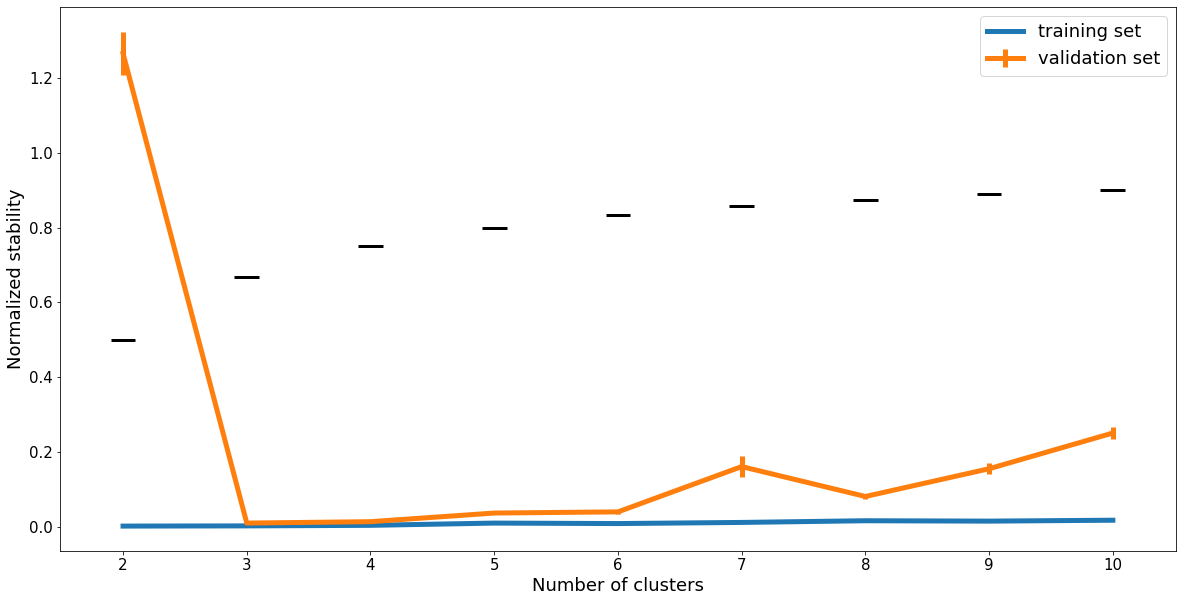

In [32]:
from reval.visualization import plot_metrics
plot_metrics(metric)

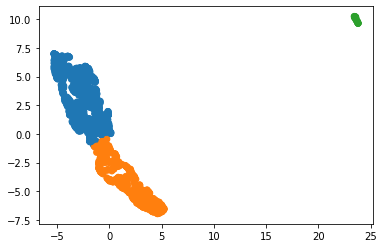

In [33]:
#umap plot train
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.scatter(X_tr_prepr[[0]], X_tr_prepr[[1]], color=[colors[lab] for lab in out.train_cllab])

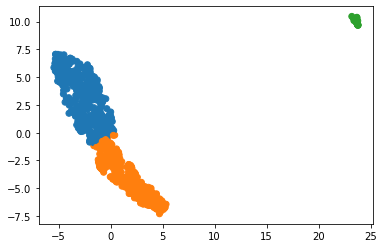

In [34]:
plt.scatter(X_ts_prepr[[0]], X_ts_prepr[[1]], color=[colors[lab] for lab in out.test_cllab])

In [36]:
X_tr_['cluster_domain']=  out.train_cllab
X_tr_["TR_TS"] = "TR"

X_ts_['cluster_domain']=  out.test_cllab
X_ts_["TR_TS"] = "TS"

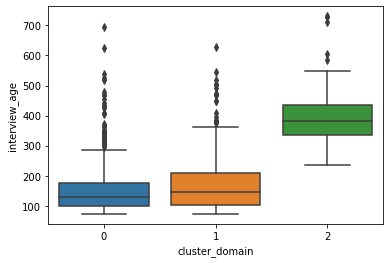

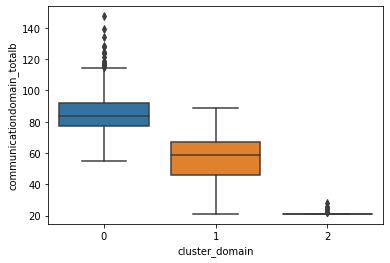

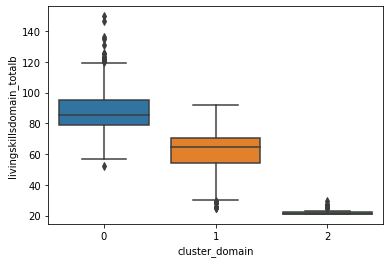

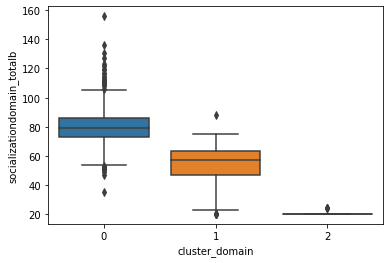

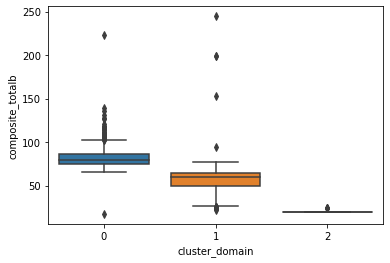

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset_trts_cl = X_tr_.append(X_ts_)
cols = ['interview_age', 'communicationdomain_totalb','livingskillsdomain_totalb','socializationdomain_totalb','composite_totalb']
for c in cols:
    _data_train = dataset_trts_cl.loc[dataset_trts_cl['TR_TS']=='TR',]
    plt.figure()
    sns.boxplot(x="cluster_domain", y=c, data=_data_train)


In [ ]:
X_tr_split.groupby(['cluster_domain']).count()

In [ ]:
X_ts_split.groupby(['cluster_domain']).mean()

In [38]:
for table in metric.keys():
    data = pd.DataFrame(columns=['k','value','CI'])
    for row in metric[table]:
        _dict_append = {'k':row,
                     'value':metric[table][row][1][0],
                     'CI':metric[table][row][1][1]}
        data= data.append(_dict_append,ignore_index=True)
        
    data.to_csv(os.path.join(results_path,'_'.join([table,'metric_for_plot_051022.csv'])))

In [40]:
#save umap values for future works!
X_tr_2save = X_tr.copy()
X_ts_2save = X_ts.copy()
X_tr_2save['tr_ts']='tr'
X_tr_2save['cluster_domain']=out.train_cllab
X_ts_2save['tr_ts']='ts'
X_ts_2save['cluster_domain']=out.test_cllab
UMAP_values_2save = X_tr_2save.append(X_ts_2save)
UMAP_values_2save.to_csv(os.path.join(results_path,"UMAP_values_VABSold_051022.csv"))

In [41]:
X_tr_2save

,0,1,tr_ts,cluster_domain
subjectkey,,,,
NDARUY282MTC,-0.183115,1.758803,tr,0
NDAR_INVSD261LFJ,-0.580506,-1.024315,tr,1
NDARNZ071HNR,-1.915706,5.412830,tr,0
NDAR_INVZ3GYT068,3.255100,-5.177734,tr,1
NDARFY308EJ8,-3.082916,5.512475,tr,0
...,...,...,...,...
NDAR_INVW5UALL9U,5.025276,-6.760363,tr,1
NDARDW146VGE,1.388145,-4.195701,tr,1
NDARUR864GDR,3.914509,-5.591284,tr,1


In [43]:
#save results
TR_original['cluster_domain']=  out.train_cllab
TR_original["TR_TS"] = "TR"

TS_original['cluster_domain']=  out.test_cllab
TS_original["TR_TS"] = "TS"
dataset_trts_cl = TR_original.append(TS_original)
dataset_trts_cl.to_csv(os.path.join(results_path,"VABS_old_withcl_051022_withgridsearch.csv"))

In [44]:
dataset_trts_cl

,Unnamed: 0,collection_id,src_subject_id,sex,interview_age,interview_date,original_communicationdomain_totalb,original_livingskillsdomain_totalb,original_socializationdomain_totalb,original_motorskillsdomain_totalb,...,miss,age_round,quantile_age,format,TR_TS,communicationdomain_totalb,livingskillsdomain_totalb,socializationdomain_totalb,composite_totalb,cluster_domain
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARUY282MTC,1,2288,A39P5613,M,95,09/22/2017,71.0,70.0,77.0,NaN,...,0,7.916667,1,ed_3,TR,74.911222,75.297146,80.909632,76.073349,0
NDAR_INVSD261LFJ,2,2368,NDAR_INVSD261LFJ,M,103,05/06/2013,65.0,65.0,64.0,999.0,...,0,8.583333,2,survey,TR,69.435082,71.573764,67.825139,68.499758,1
NDARNZ071HNR,3,6,10024,M,128,02/08/2008,75.0,85.0,89.0,999.0,...,0,10.666667,4,interview,TR,75.000000,85.000000,89.000000,81.000000,0
NDAR_INVZ3GYT068,4,2064,116,F,181,03/16/2015,45.0,54.0,58.0,0.0,...,0,15.083333,6,interview,TR,45.000000,54.000000,58.000000,52.000000,1
NDARFY308EJ8,5,2288,H13K8950,F,111,11/17/2018,79.0,93.0,88.0,NaN,...,0,9.250000,3,ed_3,TR,82.911222,98.297146,91.909632,87.073349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARFL075ZEN,842,2021,NDARFL075ZEN,F,130,04/13/2015,61.0,58.0,61.0,999.0,...,0,10.833333,4,survey,TS,65.435082,64.573764,64.825139,63.499758,1
NDARCG106YXC,843,10,12/10/10,M,122,11/02/2010,88.0,93.0,76.0,NaN,...,1,10.166667,4,interview,TS,88.000000,93.000000,76.000000,NaN,0
NDARUA570YY7,844,2021,NDARUA570YY7,M,205,07/30/2013,66.0,65.0,67.0,999.0,...,0,17.083333,7,survey,TS,70.435082,71.573764,70.825139,68.499758,1
